In [ ]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
from matplotlib import pyplot as plt

## Sampling distribution

### The first example: sample of dice rolls

What do you see on the following picture?

This is a visual representation of the fact that each function from the sample, e.g. sample mean, also has a random nature! And each time you generate new sample, the value of the chosen function will be different.

Try to change ```sample_size``` variable and see what happens.

In [ ]:
n_draws = 100
sample_size = 100000
r = stats.randint(1,7)
mu = r.mean()
var = r.var()
sample_mean_realizations = np.empty(n_draws)
rv_realizations = np.empty(n_draws)


for i in range(n_draws):
    sample_realization = r.rvs(size=sample_size)
    sample_mean_realizations[i] = np.mean(sample_realization)
    rv_realizations[i] = r.rvs()

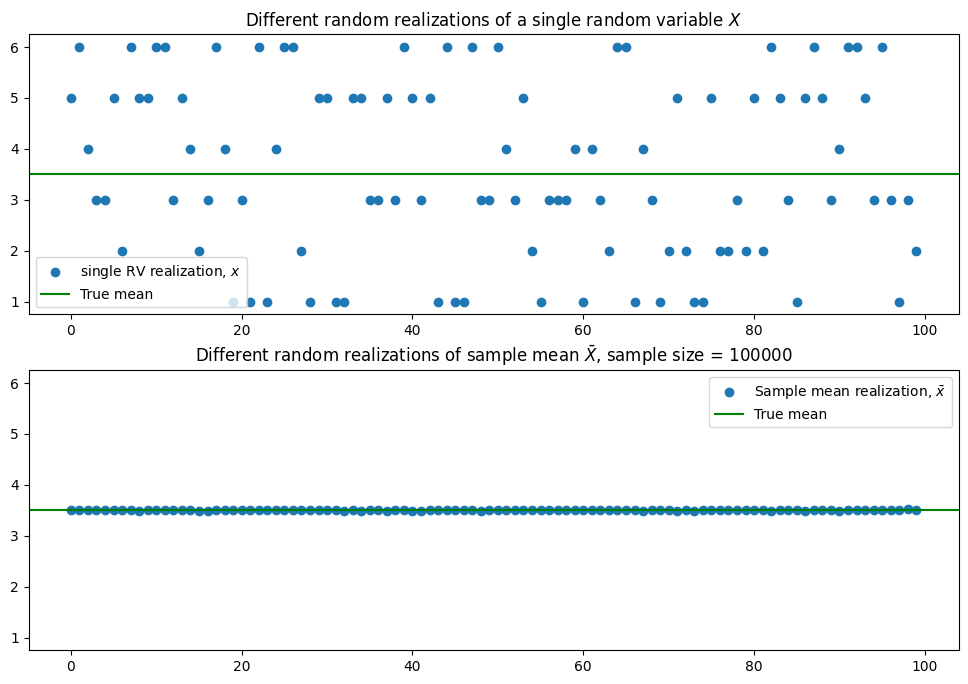

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
ax1.scatter(np.arange(n_draws), rv_realizations, label=r'single RV realization, $x$')
ax1.axhline(r.mean(), color='green', label = 'True mean')
ax2.scatter(np.arange(n_draws), sample_mean_realizations, label=r'Sample mean realization, $\bar{x}$')
ax2.axhline(r.mean(), color='green', label = 'True mean')


ylim = ax1.get_ylim()
ax2.set_ylim(ylim)

ax1.legend()
ax2.legend()
ax1.set_title(r'Different random realizations of a single random variable $X$')
ax2.set_title(r'Different random realizations of sample mean $\bar{X}$, sample size = %d' % sample_size)
plt.show()

If on the previous picture we present just a few different realiations, in the following we generate much more samples and try to approximate the probability density function by plotting a histogram.

As well, try to change ```sample_size``` in below and see what happens with the histogram.

In [ ]:
n_draws = 1000
sample_size = 500
n_bins = 50
r = stats.randint(1,7)
sample_mean_realizations = np.empty(n_draws)
rv_realizations = np.empty(n_draws)

for i in range(n_draws):
    sample_realization = r.rvs(size=sample_size)
    sample_mean_realizations[i] = np.mean(sample_realization)
    rv_realizations[i] = r.rvs()

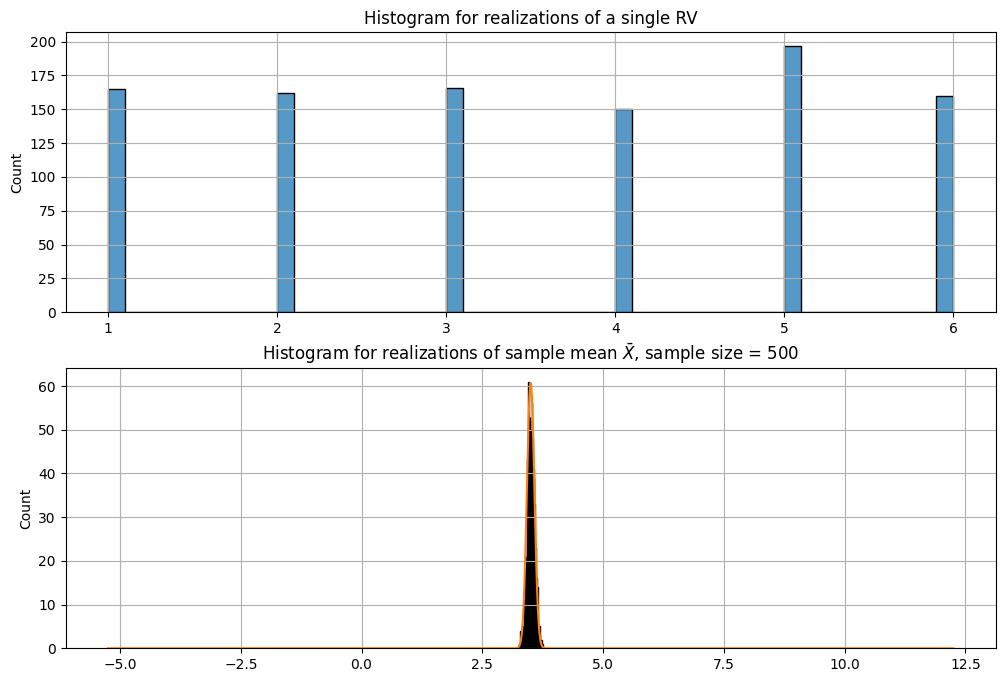

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

sns.histplot(rv_realizations, bins=n_bins, ax=ax1).grid()

sns.histplot(sample_mean_realizations, bins=n_bins, ax=ax2).grid()
counts, _, _ = plt.hist(sample_mean_realizations, bins=n_bins, alpha=0.0)  # just in order to find out the scaling coefficient for PDF
plt.title('Histogram for standard normal variable')
#     plt.axvline(x=np.mean(z), label='Mean of Sample Means')

# scaling of normal PDF is needed, because histogram has large values on y-axis, and we need to fit them
x_space = np.linspace(mu - 3 * var,  mu + 3 * var, 1000)
ax2.plot(x_space, np.max(counts) * stats.norm.pdf(x_space, mu, np.sqrt(var / sample_size)) * np.sqrt(2 * np.pi * var / sample_size), label='Normal density')
# ax1.legend()
# ax2.legend()
ax1.set_title('Histogram for realizations of a single RV')
ax2.set_title(r'Histogram for realizations of sample mean $\bar{X}$, sample size = %d' % sample_size)
plt.show()

### The second example: sampling from normal distribution

In [ ]:
r = stats.norm(5000, 200)
n_draws = 100
sample_size = 30
mu = r.mean()
var = r.var()
std = r.std()
sample_mean_realizations = np.empty(n_draws)
rv_realizations = np.empty(n_draws)


for i in range(n_draws):
    sample_realization = r.rvs(size=sample_size)
    sample_mean_realizations[i] = np.mean(sample_realization)
    rv_realizations[i] = r.rvs()

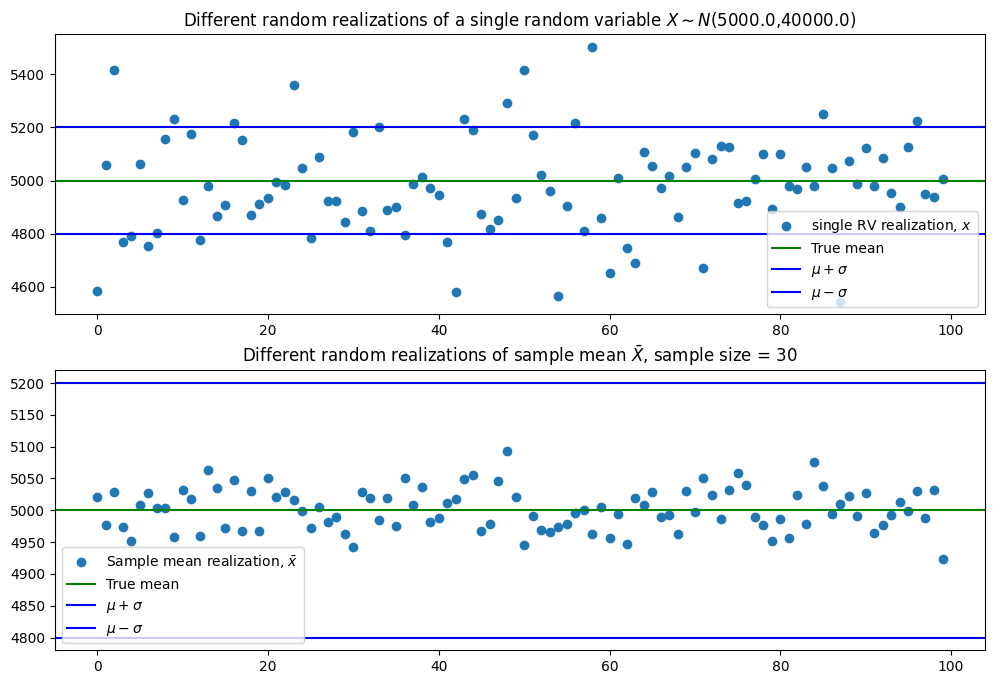

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
ax1.scatter(np.arange(n_draws), rv_realizations, label=r'single RV realization, $x$')
ax1.axhline(r.mean(), color='green', label = 'True mean')
ax1.axhline(r.mean() + std, color='blue', label = r'$\mu + \sigma$')
ax1.axhline(r.mean() - std, color='blue', label = r'$\mu - \sigma$')

ax2.scatter(np.arange(n_draws), sample_mean_realizations, label=r'Sample mean realization, $\bar{x}$')
ax2.axhline(r.mean(), color='green', label = 'True mean')
ax2.axhline(r.mean() + std, color='blue', label = r'$\mu + \sigma$')
ax2.axhline(r.mean() - std, color='blue', label = r'$\mu - \sigma$')
ax1.legend(loc='best')
ax2.legend(loc='best')
ax1.set_title(r'Different random realizations of a single random variable $X \sim N$({},{})'.format(mu,var))
ax2.set_title(r'Different random realizations of sample mean $\bar{X}$, sample size = %d' % sample_size)
plt.show()

In [ ]:
n_draws = 10000
sample_size = 1000
n_bins = 50
sample_mean_realizations = np.empty(n_draws)
rv_realizations = np.empty(n_draws)

for i in range(n_draws):
    sample_realization = r.rvs(size=sample_size)
    sample_mean_realizations[i] = np.mean(sample_realization)
    rv_realizations[i] = r.rvs()

/tmp/ipython-input-3742480432.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()


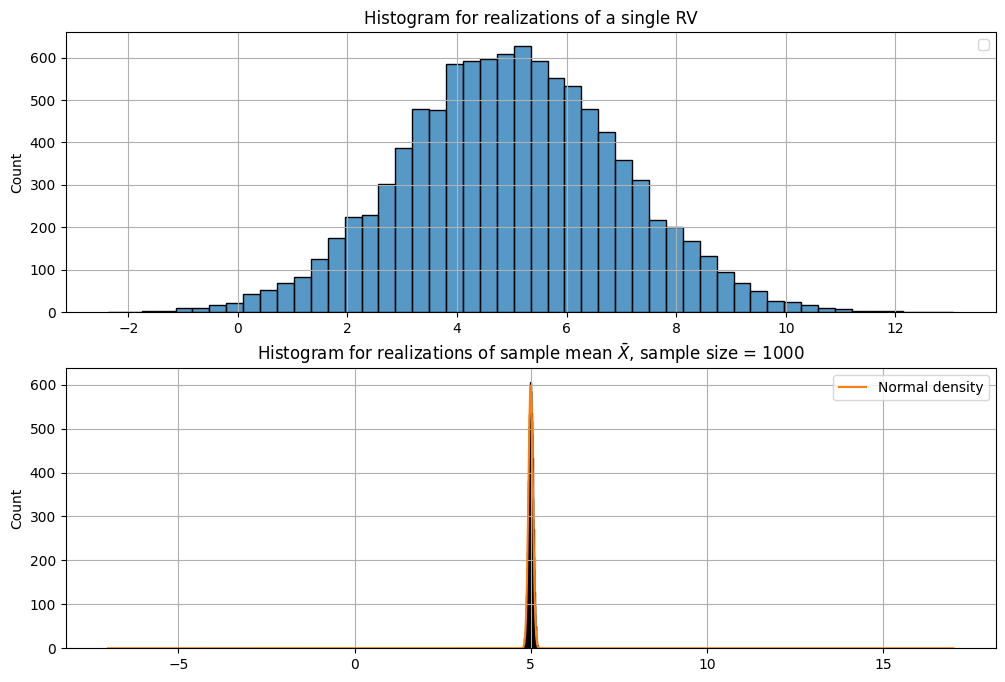

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

sns.histplot(rv_realizations, bins=n_bins, ax=ax1).grid()

sns.histplot(sample_mean_realizations, bins=n_bins, ax=ax2).grid()
counts, _, _ = plt.hist(sample_mean_realizations, bins=n_bins, alpha=0.0)  # just in order to find out the scaling coefficient for PDF
plt.title('Histogram for standard normal variable')
#     plt.axvline(x=np.mean(z), label='Mean of Sample Means')

# scaling of normal PDF is needed, because histogram has large values on y-axis, and we need to fit them
x_space = np.linspace(mu - 3 * var,  mu + 3 * var, 1000)
ax2.plot(x_space, np.max(counts) * stats.norm.pdf(x_space, mu, np.sqrt(var / sample_size)) * np.sqrt(2 * np.pi * var / sample_size), label='Normal density')
ax1.legend()
ax2.legend()
ax1.set_title('Histogram for realizations of a single RV')
ax2.set_title(r'Histogram for realizations of sample mean $\bar{X}$, sample size = %d' % sample_size)
plt.show()

### The third example: sample variance from dice rolls


What do you see on the following picture?

This is a visual representation of the fact that sample variance also has a random nature! Each time you generate a new sample, the value of the sample variance will be different.

Try to change ```sample_size``` variable and see what happens.


In [ ]:
n_draws = 100
sample_size = 100000
r = stats.randint(1,7)
mu = r.mean()
var = r.var()
sample_variance_realizations = np.empty(n_draws)
rv_realizations = np.empty(n_draws)


for i in range(n_draws):
    sample_realization = r.rvs(size=sample_size)
    sample_variance_realizations[i] = np.var(sample_realization, ddof=1)  # unbiased estimator
    rv_realizations[i] = r.rvs()


In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
ax1.scatter(np.arange(n_draws), rv_realizations, label=r'single RV realization, $x$')
ax1.axhline(r.mean(), color='green', label = 'True mean')
ax2.scatter(np.arange(n_draws), sample_variance_realizations, label=r'Sample variance realization, $s^2$')
ax2.axhline(r.var(), color='green', label = 'True variance')


ylim = ax1.get_ylim()
ax2.set_ylim(ylim)

ax1.legend()
ax2.legend()
ax1.set_title(r'Different random realizations of a single random variable $X$')
ax2.set_title(r'Different random realizations of sample variance $S^2$, sample size = %d' % sample_size)
plt.show()


If on the previous picture we present just a few different realizations, in the following we generate much more samples and try to approximate the probability density function by plotting a histogram.

As well, try to change ```sample_size``` in below and see what happens with the histogram.


In [ ]:
n_draws = 1000
sample_size = 500
n_bins = 50
r = stats.randint(1,7)
sample_variance_realizations = np.empty(n_draws)
rv_realizations = np.empty(n_draws)

for i in range(n_draws):
    sample_realization = r.rvs(size=sample_size)
    sample_variance_realizations[i] = np.var(sample_realization, ddof=1)  # unbiased estimator
    rv_realizations[i] = r.rvs()


In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

sns.histplot(rv_realizations, bins=n_bins, ax=ax1).grid()

sns.histplot(sample_variance_realizations, bins=n_bins, ax=ax2).grid()
counts, _, _ = plt.hist(sample_variance_realizations, bins=n_bins, alpha=0.0)  # just in order to find out the scaling coefficient for PDF

# For large sample sizes, sample variance is approximately normal
# E[S^2] = σ², Var[S^2] ≈ 2σ⁴/(n-1) for normal distribution
# For uniform distribution, the approximation is less accurate but still useful
x_space = np.linspace(0, 3 * var, 1000)
ax2.plot(x_space, np.max(counts) * stats.norm.pdf(x_space, var, np.sqrt(2 * var**2 / (sample_size - 1))) * np.sqrt(2 * np.pi * 2 * var**2 / (sample_size - 1)), label='Normal approximation', color='red')

ax1.set_title('Histogram for realizations of a single RV')
ax2.set_title(r'Histogram for realizations of sample variance $S^2$, sample size = %d' % sample_size)
ax2.axvline(var, color='green', linestyle='--', label='True variance')
ax2.legend()
plt.show()


### The fourth example: sample variance from normal distribution


In [ ]:
r = stats.norm(5000, 200)
n_draws = 100
sample_size = 30
mu = r.mean()
var = r.var()
std = r.std()
sample_variance_realizations = np.empty(n_draws)
rv_realizations = np.empty(n_draws)


for i in range(n_draws):
    sample_realization = r.rvs(size=sample_size)
    sample_variance_realizations[i] = np.var(sample_realization, ddof=1)  # unbiased estimator
    rv_realizations[i] = r.rvs()


In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
ax1.scatter(np.arange(n_draws), rv_realizations, label=r'single RV realization, $x$')
ax1.axhline(r.mean(), color='green', label = 'True mean')
ax1.axhline(r.mean() + std, color='blue', label = r'$\mu + \sigma$')
ax1.axhline(r.mean() - std, color='blue', label = r'$\mu - \sigma$')

ax2.scatter(np.arange(n_draws), sample_variance_realizations, label=r'Sample variance realization, $s^2$')
ax2.axhline(r.var(), color='green', label = 'True variance')
ax2.axhline(r.var() + np.sqrt(2 * var**2 / (sample_size - 1)), color='blue', label = r'$\sigma^2 + \sqrt{Var(S^2)}$')
ax2.axhline(r.var() - np.sqrt(2 * var**2 / (sample_size - 1)), color='blue', label = r'$\sigma^2 - \sqrt{Var(S^2)}$')
ax1.legend(loc='best')
ax2.legend(loc='best')
ax1.set_title(r'Different random realizations of a single random variable $X \sim N$({},{})'.format(mu,var))
ax2.set_title(r'Different random realizations of sample variance $S^2$, sample size = %d' % sample_size)
plt.show()


In [ ]:
n_draws = 10000
sample_size = 1000
n_bins = 50
sample_variance_realizations = np.empty(n_draws)
rv_realizations = np.empty(n_draws)

for i in range(n_draws):
    sample_realization = r.rvs(size=sample_size)
    sample_variance_realizations[i] = np.var(sample_realization, ddof=1)  # unbiased estimator
    rv_realizations[i] = r.rvs()


In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

sns.histplot(rv_realizations, bins=n_bins, ax=ax1).grid()

sns.histplot(sample_variance_realizations, bins=n_bins, ax=ax2).grid()
counts, _, _ = plt.hist(sample_variance_realizations, bins=n_bins, alpha=0.0)  # just in order to find out the scaling coefficient for PDF

# For normal distribution, (n-1)*S²/σ² ~ χ²(n-1)
# So S² ~ (σ²/(n-1)) * χ²(n-1)
# E[S²] = σ², Var[S²] = 2σ⁴/(n-1)
x_space = np.linspace(var - 3 * np.sqrt(2 * var**2 / (sample_size - 1)), var + 3 * np.sqrt(2 * var**2 / (sample_size - 1)), 1000)
ax2.plot(x_space, np.max(counts) * stats.norm.pdf(x_space, var, np.sqrt(2 * var**2 / (sample_size - 1))) * np.sqrt(2 * np.pi * 2 * var**2 / (sample_size - 1)), label='Normal approximation', color='red')

ax1.set_title('Histogram for realizations of a single RV')
ax2.set_title(r'Histogram for realizations of sample variance $S^2$, sample size = %d' % sample_size)
ax2.axvline(var, color='green', linestyle='--', label='True variance')
ax2.legend()
plt.show()
